# Sentiment Analysis of Financial News Using NLTK and Spacy

Predict sentiment in financial news articles using NLTK and perform live sentiment analysis on articles scraped from URLs.

# About Dataset
https://www.kaggle.com/datasets/notlucasp/financial-news-headlines/code

This dataset contains 2 csv file

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


## **Download and add the csv files on the Runtime environment before running all the cells**

# Columns Provided in the Dataset

cnbc headline df
1. time
2. headlines
3. Description

reuters headline df
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



In [ ]:
!pip install nltk

In [ ]:
import warnings

# Ignore all warnings (not recommended in most cases)
warnings.filterwarnings("ignore")

In [ ]:
# Import all the required libraries
import nltk
#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#import machine learning libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Basic EDA on cnbc_headlines dataset

In [ ]:
import pandas as pd

# Define the path to the CSV file
#csv_path = "/content/drive/MyDrive/cnbc_headlines.csv"

csv_path = "cnbc_headlines.csv"

# Read the CSV file using Pandas
cnbc_dataset = pd.read_csv(csv_path)


In [ ]:
# Display the first few rows of the DataFrame
cnbc_dataset

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
# check the shape of cnbc headline dataset
cnbc_dataset.shape

(3080, 3)

In [ ]:
# Check which columns are having categorical, numerical or boolean values
cnbc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc_dataset.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [ ]:
# Drop nan values in cnbc headline dataset
cnbc_dataset = cnbc_dataset.dropna()

In [ ]:
cnbc_dataset.shape

(2800, 3)

In [ ]:
# Count the duplicate rows
cnbc_dataset.duplicated().sum()

0

In [ ]:
# Drop the duplicate rows in the dataset keep the first one
cnbc_dataset = cnbc_dataset.drop_duplicates(keep='first')

cnbc_dataset.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [ ]:
# Check the shape of cnbc headline dataset
cnbc_dataset.shape

(2800, 3)

# Basic EDA on reuters headlines

In [ ]:


# Read the CSV file using Pandas
#reuters_dataset = pd.read_csv("/content/drive/MyDrive/reuters_headlines.csv")
reuters_dataset = pd.read_csv("reuters_headlines.csv")

In [ ]:
# Display the first few rows of the DataFrame
reuters_dataset.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [ ]:
# Check the shape of reuters headlines dataset
reuters_dataset.shape

(32770, 3)

In [ ]:
#check the columns of reuters headline dataset
reuters_dataset.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
reuters_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_dataset.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
# Dropp the duplicate rows in reuters headlines dataset and keep the first one
reuters_dataset = reuters_dataset.drop_duplicates(keep='first')
reuters_dataset

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


# Making some functions that we will need  ahead

### Preprocessing

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **Remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **Remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **Stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


In [ ]:
# Create a function for preprocessing

def preprocess_text(text, stemming=False, lemmatizing=False):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]

    # Apply stemming if specified
    if stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

    # Apply lemmatizing if specified
    if lemmatizing:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

    # Join the preprocessed words back into a sentence
    processed_text = ' '.join(words)

    return processed_text

# Lets begin Sentiment Analysis

In [ ]:
# Import sentiment intensity analyzer

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Fuction to  decide sentiment as positive, negative and neutral
def get_sentiment_label(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    # Decide sentiment label based on compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage
headline = "Financial year is going bad for 2023"
sentiment_label = get_sentiment_label(headline)
print("Sentiment Label:", sentiment_label)


Sentiment Label: Negative


In [ ]:
# Concatenate cnbc headlines dataset and reuters headline dataset
combined_dataset = pd.concat([cnbc_dataset, reuters_dataset], ignore_index=True)

In [ ]:
# Check the shape of this new dataset
combined_dataset.shape

(35515, 3)

In [ ]:
# Make a copy of new dataset
combined_dataset_copy = combined_dataset.copy()

In [ ]:
combined_dataset_copy

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
# Apply preprocessing function to the 'Description' of new dataset (combined_df_copy)
combined_dataset_copy['Description'] = combined_dataset_copy['Description'].apply(preprocess_text)

# Display the first few rows of the DataFrame after preprocessing
combined_dataset_copy.head()


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer rings lightning roun...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earnings noncovid companies lancet pu...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo joins closing bell ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stocks highquality companies going lower ...


### Calculate Polarity Score

Polarity score is a metric used in sentiment analysis to quantify the sentiment or emotion expressed in a piece of text. It indicates whether the text expresses a positive, negative, or neutral sentiment. Polarity scores are typically numerical values that range from -1 to 1:

    A polarity score of 1 indicates a highly positive sentiment.
    A polarity score of -1 indicates a highly negative sentiment.
    A polarity score close to 0 indicates a neutral sentiment.

Polarity scores are often calculated using various natural language processing techniques, including lexicon-based methods, machine learning models, and rule-based systems. In the context of sentiment analysis, polarity scores are used to determine the sentiment of a text and categorize it as positive, negative, or neutral based on the calculated score.

In NLTK's SentimentIntensityAnalyzer, the **polarity_scores()** function computes a polarity score for a given text, providing values for positive, negative, neutral, and compound sentiments. The compound sentiment score is often used to make overall sentiment predictions, as it combines all three sentiment components into a single value.

In [ ]:
# Analyze polarity score of values in description and  add new column ''ds_score'' in dataset
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

combined_dataset_copy['ds_score'] = combined_dataset_copy['Description'].apply(get_sentiment_score)

combined_dataset_copy.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,0.1280
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer rings lightning roun...,-0.2023
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earnings noncovid companies lancet pu...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo joins closing bell ...,0.5719
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stocks highquality companies going lower ...,-0.6597


In [ ]:
# Apply the function  which decides sentiment to  polarity score column

# Create a function to decide sentiment label based on polarity score
def decide_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the decide_sentiment_label function to the 'ds_score' column
combined_dataset_copy['sentiment_label'] = combined_dataset_copy['ds_score'].apply(decide_sentiment_label)


In [ ]:
# Display the first few rows of the DataFrame with the new sentiment label column
combined_dataset_copy.head()

,Headlines,Time,Description,ds_score,sentiment_label
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,0.1280,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer rings lightning roun...,-0.2023,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earnings noncovid companies lancet pu...,0.5574,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo joins closing bell ...,0.5719,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stocks highquality companies going lower ...,-0.6597,Negative


In the description

there are approx

16000 positive statment

12000 negative statment

6000 neutral statment

# Now working with headlines + description

Performing sentiment analysis on both headlines and descriptions can provide a more comprehensive understanding of the sentiment expressed in financial news articles.

Here are a few reasons why analyzing both headlines and descriptions could be valuable:

1.    Richer Context: Headlines provide a concise summary of the article's main theme, while descriptions offer more detailed information. By analyzing both, you can capture the sentiment of the main idea as well as the supporting context.

2.    Nuanced Sentiment: Headlines often focus on attracting attention, which can sometimes result in sensationalism. Descriptions, on the other hand, may contain more nuanced and balanced sentiment.

3.    Detection of Changes: Sentiment can change from the headline to the description, reflecting shifts in the article's tone or focus. Analyzing both can help detect these changes.

4.    Performance Improvement: Combining multiple sources of information (headlines and descriptions) can potentially lead to better sentiment analysis results, as one source might compensate for limitations in the other.

5.    Informed Decision-Making: In financial contexts, understanding sentiment is crucial for making informed decisions. By analyzing both headlines and descriptions, you can gain deeper insights into market perceptions and trends.

6.    Research and Strategy: Researchers and investors may benefit from a more thorough sentiment analysis that considers both headlines and descriptions to guide their research and investment strategies.

7.    Robustness: If sentiment analysis on one source (e.g., headlines) is less accurate due to inherent biases or limitations, using another source (e.g., descriptions) can enhance the robustness of the analysis.

In [ ]:

# Merge the 'Headlines' and 'Description' columns and create a new column 'Info'
combined_dataset_copy['Info'] = combined_dataset_copy['Headlines'] + ' ' + combined_dataset_copy['Description']

# Print the updated DataFrame
combined_dataset_copy

,Headlines,Time,Description,ds_score,sentiment_label,Info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,0.1280,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer rings lightning roun...,-0.2023,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earnings noncovid companies lancet pu...,0.5574,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo joins closing bell ...,0.5719,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stocks highquality companies going lower ...,-0.6597,Negative,Wall Street delivered the 'kind of pullback I'...
...,...,...,...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...,-0.3400,Negative,Malaysia says never hired British data firm at...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutors said tuesday searched volks...,0.3612,Positive,Prosecutors search Volkswagen headquarters in ...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonalds corp tuesday announced approved scie...,-0.2263,Negative,McDonald's sets greenhouse gas reduction targe...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveries spare engi...,-0.6808,Negative,Pratt & Whitney to deliver spare A320neo engin...


In [ ]:
combined_dataset_copy.columns

Index(['Headlines', 'Time', 'Description', 'ds_score', 'sentiment_label',
       'Info'],
      dtype='object')

In [ ]:
# Keep only the 'Info' and 'Time' columns and drop the remaining columns
combined_dataset_copy = combined_dataset_copy[['Info', 'Time']]

# Print the updated DataFrame
combined_dataset_copy.head()

,Info,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne...,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [ ]:
 # Apply the preprocessing function to the 'Info' column
combined_dataset_copy['Info'] = combined_dataset_copy['Info'].apply(preprocess_text)

# Print the updated DataFrame
combined_dataset_copy

,Info,Time
0,jim cramer better way invest covid19 vaccine g...,"7:51 PM ET Fri, 17 July 2020"
1,cramers lightning round would teradyne mad mon...,"7:33 PM ET Fri, 17 July 2020"
2,cramers week ahead big week earnings even bigg...,"7:25 PM ET Fri, 17 July 2020"
3,iq capital ceo keith bliss says tech healthcar...,"4:24 PM ET Fri, 17 July 2020"
4,wall street delivered kind pullback ive waitin...,"7:36 PM ET Thu, 16 July 2020"
...,...,...
35510,malaysia says never hired british data firm ce...,Mar 20 2018
35511,prosecutors search volkswagen headquarters new...,Mar 20 2018
35512,mcdonalds sets greenhouse gas reduction target...,Mar 20 2018
35513,pratt whitney deliver spare a320neo engines so...,Mar 20 2018


In [ ]:
# Analyze polarity score of values in info and  add new column 'info_score' of it in dataset

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to calculate polarity scores
def get_polarity_score(text):
    return sia.polarity_scores(text)['compound']


In [ ]:
# Apply the polarity score function to the 'Info' column
combined_dataset_copy['info_score'] = combined_dataset_copy['Info'].apply(get_polarity_score)

# Print the updated DataFrame
combined_dataset_copy

,Info,Time,info_score
0,jim cramer better way invest covid19 vaccine g...,"7:51 PM ET Fri, 17 July 2020",0.5267
1,cramers lightning round would teradyne mad mon...,"7:33 PM ET Fri, 17 July 2020",-0.2023
2,cramers week ahead big week earnings even bigg...,"7:25 PM ET Fri, 17 July 2020",0.5574
3,iq capital ceo keith bliss says tech healthcar...,"4:24 PM ET Fri, 17 July 2020",0.8126
4,wall street delivered kind pullback ive waitin...,"7:36 PM ET Thu, 16 July 2020",-0.2500
...,...,...,...
35510,malaysia says never hired british data firm ce...,Mar 20 2018,-0.3400
35511,prosecutors search volkswagen headquarters new...,Mar 20 2018,0.3612
35512,mcdonalds sets greenhouse gas reduction target...,Mar 20 2018,-0.2263
35513,pratt whitney deliver spare a320neo engines so...,Mar 20 2018,-0.6808


In [ ]:
# Function to map polarity scores to sentiment labels
def map_to_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the mapping function to the 'info_score' column
combined_dataset_copy['info_score'] = combined_dataset_copy['info_score'].apply(map_to_sentiment)

# Print the updated DataFrame
combined_dataset_copy

,Info,Time,info_score
0,jim cramer better way invest covid19 vaccine g...,"7:51 PM ET Fri, 17 July 2020",Positive
1,cramers lightning round would teradyne mad mon...,"7:33 PM ET Fri, 17 July 2020",Negative
2,cramers week ahead big week earnings even bigg...,"7:25 PM ET Fri, 17 July 2020",Positive
3,iq capital ceo keith bliss says tech healthcar...,"4:24 PM ET Fri, 17 July 2020",Positive
4,wall street delivered kind pullback ive waitin...,"7:36 PM ET Thu, 16 July 2020",Negative
...,...,...,...
35510,malaysia says never hired british data firm ce...,Mar 20 2018,Negative
35511,prosecutors search volkswagen headquarters new...,Mar 20 2018,Positive
35512,mcdonalds sets greenhouse gas reduction target...,Mar 20 2018,Negative
35513,pratt whitney deliver spare a320neo engines so...,Mar 20 2018,Negative


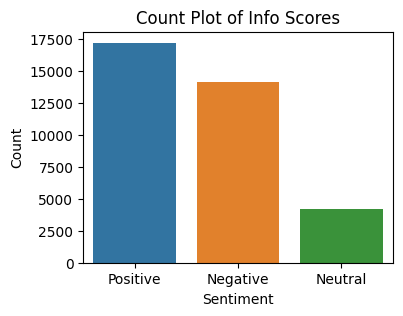

In [ ]:
# Perform count plot on info_score column
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'info_score' column
plt.figure(figsize=(4, 3))
sns.countplot(data=combined_dataset_copy, x='info_score')
plt.title('Count Plot of Info Scores')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the sum of each type of 'info_score'
score_counts = combined_dataset_copy['info_score'].value_counts()

# Print the count of each type of 'info_score'
print(score_counts)


Positive    17188
Negative    14149
Neutral      4178
Name: info_score, dtype: int64


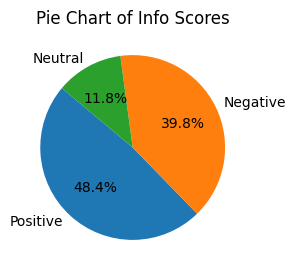

In [ ]:
# Perform pie chart on info_score column
import matplotlib.pyplot as plt

# Calculate the count of each type of 'info_score'
score_counts = combined_dataset_copy['info_score'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Info Scores')
plt.show()

In the dataset

info contains

48.4 % positive statments

39.8% negtive statements

11.3% neutral statments

# Model Building on headlines + description

In [ ]:
# Split the dataset  into test and train
# 90% train , 10% test and random state 212

from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_dataset_copy['Info'],  # Features (Info column)
    combined_dataset_copy['info_score'],  # Target (info_score column)
    test_size=0.1,  # 10% test size
    random_state=212
)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (31963,)
Test set shape: (3552,)


# (1) LINEAR SUPPORT VECTOR MACHINE


In [ ]:
# Now you can use the 'pipeline'

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a pipeline with TF-IDF vectorization and LinearSVC
pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LinearSVC())
])

# Fit the pipeline to the training data
pipeline_svc.fit(X_train, y_train)

# Predict on the test dataset
y_pred = pipeline_svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8381193693693694
Confusion Matrix:
 [[1246   44  135]
 [ 110  158  137]
 [ 108   41 1573]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      1425
     Neutral       0.65      0.39      0.49       405
    Positive       0.85      0.91      0.88      1722

    accuracy                           0.84      3552
   macro avg       0.78      0.73      0.74      3552
weighted avg       0.83      0.84      0.83      3552



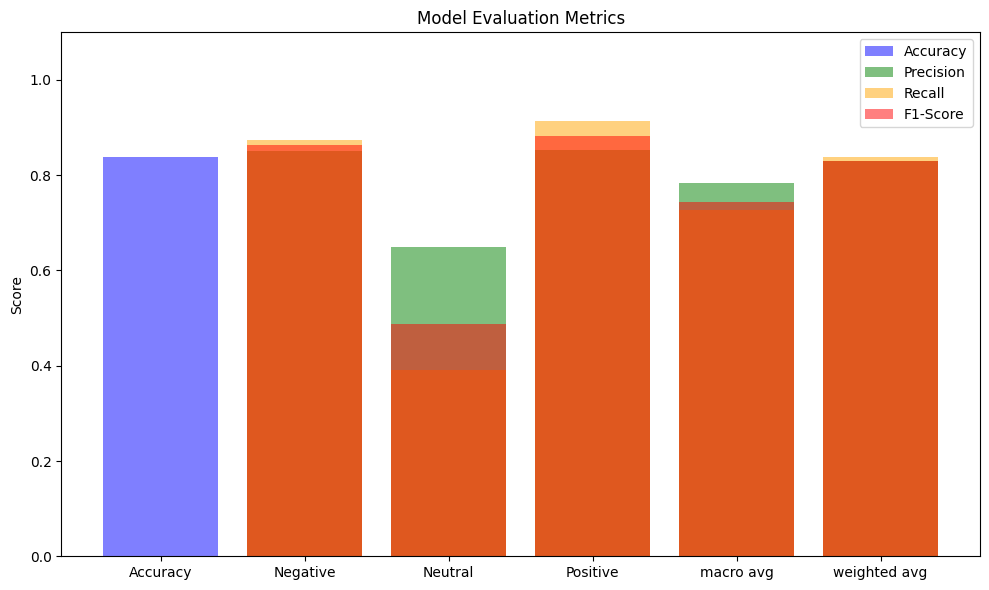

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get the classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracy, precision, recall, and F1-score
accuracy = class_report['accuracy']
precision = [class_report[label]['precision'] for label in class_report if label != 'accuracy']
recall = [class_report[label]['recall'] for label in class_report if label != 'accuracy']
f1_score = [class_report[label]['f1-score'] for label in class_report if label != 'accuracy']

# Categories include all labels except 'accuracy'
categories = [label for label in class_report if label != 'accuracy']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the accuracy
ax.bar('Accuracy', accuracy, color='blue', alpha=0.5)

# Plot precision, recall, and F1-score
for i in range(len(categories)):
    ax.bar(categories[i], precision[i], color='green', alpha=0.5)
    ax.bar(categories[i], recall[i], color='orange', alpha=0.5)
    ax.bar(categories[i], f1_score[i], color='red', alpha=0.5)

# Customize the plot
ax.set_title('Model Evaluation Metrics')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.1)  # Set the y-axis limit

# Add a legend
legend_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
ax.legend(legend_labels)

# Show the plot
plt.tight_layout()
plt.show()



<Figure size 800x600 with 0 Axes>

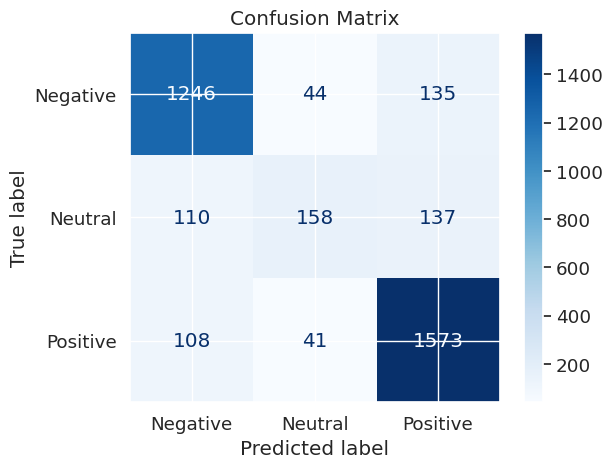

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better visualization
ConfusionMatrixDisplay(conf_matrix, display_labels=pipeline_svc.classes_).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Create a binary target variable where 1 represents positive sentiment and 0 represents negative sentiment
binary_dataset = combined_dataset_copy[combined_dataset_copy['info_score'].isin(['positive', 'negative'])]

# Ensure you have enough data for a 90-10 split
if len(binary_dataset) >= 10:
    test_size = 1 / (len(binary_dataset) // 10)
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        binary_dataset['Info'],
        (binary_dataset['info_score'] == 'positive').astype(int),  # 1 for positive, 0 for negative
        test_size=test_size,  # Adjusted test_size
        random_state=212
    )

    # Create a pipeline for binary sentiment classification with LinearSVC
    pipeline_svc = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', LinearSVC())
    ])

    # Fit the pipeline to the training data
    pipeline_svc.fit(X_train, y_train)

    # Get decision scores for the positive class
    y_pred_decision = pipeline_svc.decision_function(X_test)

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
    roc_auc = roc_auc_score(y_test, y_pred_decision)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("Not enough data for the specified split.")


Not enough data for the specified split.


# (2) LOGISTIC REGRESSION


Accuracy: 0.807713963963964
Confusion Matrix:
 [[1208   20  197]
 [ 121   94  190]
 [ 144   11 1567]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.85      0.83      1425
     Neutral       0.75      0.23      0.35       405
    Positive       0.80      0.91      0.85      1722

    accuracy                           0.81      3552
   macro avg       0.79      0.66      0.68      3552
weighted avg       0.80      0.81      0.79      3552



<Figure size 800x600 with 0 Axes>

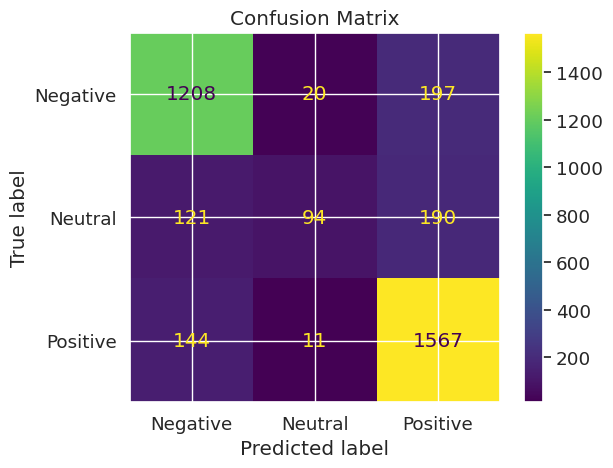

CPU times: user 7.74 s, sys: 6.78 s, total: 14.5 s
Wall time: 8.8 s


In [ ]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a pipeline with CountVectorizer, TfidfTransformer, and Logistic Regression
pipeline_lr = Pipeline([
    ('count_vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Predict on the test dataset
y_pred_lr = pipeline_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

# Print classification report
class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
ConfusionMatrixDisplay(conf_matrix_lr, display_labels=pipeline_lr.classes_).plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix")
plt.show()

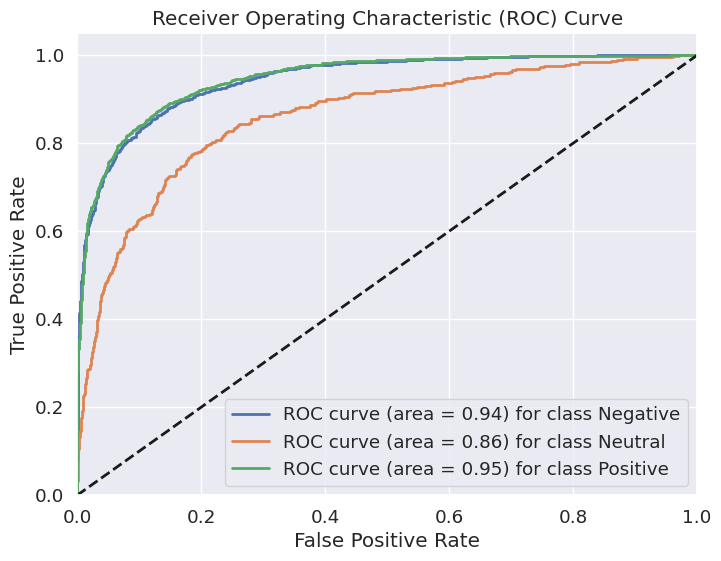

In [ ]:
# Get decision scores for each class using the predict_proba method
y_score = pipeline_lr.predict_proba(X_test)

# Binarize the labels
y_bin = label_binarize(y_test, classes=pipeline_lr.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(pipeline_lr.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_score[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(pipeline_lr.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {pipeline_lr.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# (3) MULTINOMIAL NAIVE BAYES


Accuracy: 0.7072072072072072
Confusion Matrix:
 [[ 961    0  464]
 [  84    1  320]
 [ 172    0 1550]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.67      0.73      1425
     Neutral       1.00      0.00      0.00       405
    Positive       0.66      0.90      0.76      1722

    accuracy                           0.71      3552
   macro avg       0.82      0.53      0.50      3552
weighted avg       0.75      0.71      0.66      3552



<Figure size 800x600 with 0 Axes>

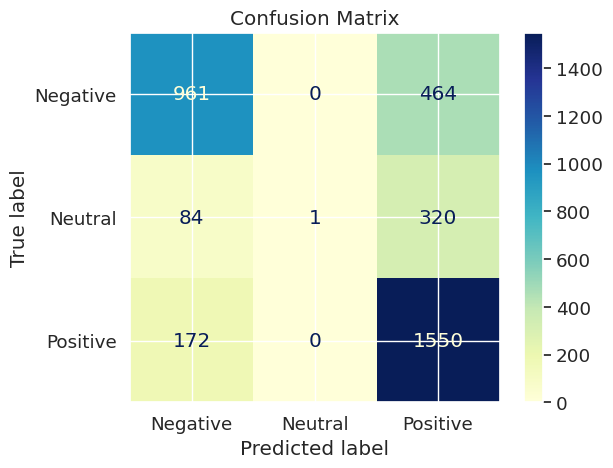

CPU times: user 1.62 s, sys: 109 ms, total: 1.73 s
Wall time: 1.62 s


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a pipeline with CountVectorizer, TfidfTransformer, and Multinomial Naive Bayes
pipeline_nb = Pipeline([
    ('count_vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

# Fit the pipeline to the training data
pipeline_nb.fit(X_train, y_train)

# Predict on the test dataset
y_pred_nb = pipeline_nb.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", conf_matrix_nb)

# Print classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
ConfusionMatrixDisplay(conf_matrix_nb, display_labels=pipeline_lr.classes_).plot(cmap="YlGnBu", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# (4) BERNOULLI NAIVE BAYES


Accuracy: 0.7179054054054054
Confusion Matrix:
 [[1082   23  320]
 [ 118   70  217]
 [ 288   36 1398]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.76      0.74      1425
     Neutral       0.54      0.17      0.26       405
    Positive       0.72      0.81      0.76      1722

    accuracy                           0.72      3552
   macro avg       0.66      0.58      0.59      3552
weighted avg       0.70      0.72      0.70      3552



<Figure size 800x600 with 0 Axes>

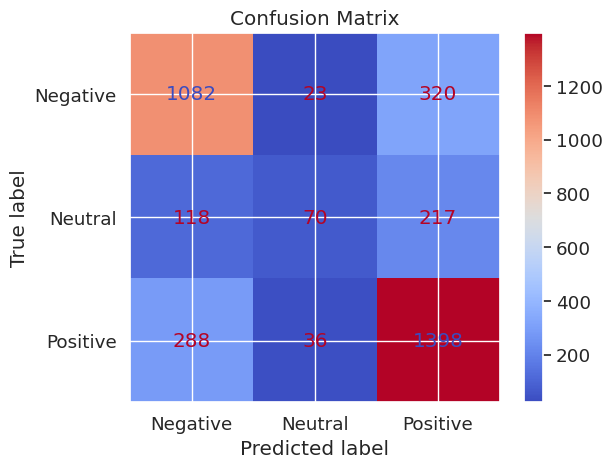

CPU times: user 2.21 s, sys: 51.7 ms, total: 2.26 s
Wall time: 2.33 s


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a pipeline with CountVectorizer, TfidfTransformer, and Bernoulli Naive Bayes
pipeline_bnb = Pipeline([
    ('count_vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', BernoulliNB())
])

# Fit the pipeline to the training data
pipeline_bnb.fit(X_train, y_train)

# Predict on the test dataset
y_pred_bnb = pipeline_bnb.predict(X_test)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("Accuracy:", accuracy_bnb)

# Calculate confusion matrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
print("Confusion Matrix:\n", conf_matrix_bnb)

# Print classification report
class_report_bnb = classification_report(y_test, y_pred_bnb)
print("Classification Report:\n", class_report_bnb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
ConfusionMatrixDisplay(conf_matrix_bnb, display_labels=pipeline_lr.classes_).plot(cmap="coolwarm", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# **Hence our best model is Linear Support Vector Machine(LSVC) with an Accuracy of 0.8381193693**

# **Now we will make predictions on our Test Data using Logistic Regression**

In [ ]:
# Perforn the prediction on the test dataset
# Predict on the test dataset using the Logistic Regression model
y_pred_lr = pipeline_lr.predict(X_test)

# Print the predicted labels
y_pred_lr


array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# Creating a dataframe of predicted results
import pandas as pd

# Create a DataFrame of predicted results
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

# Display the DataFrame
predicted_df.tail()

,Actual,Predicted
23285,Negative,Negative
14600,Positive,Positive
35364,Neutral,Positive
32933,Positive,Positive
30247,Positive,Positive


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

# Print classification report
class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report_lr)

Accuracy: 0.807713963963964
Confusion Matrix:
 [[1208   20  197]
 [ 121   94  190]
 [ 144   11 1567]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.85      0.83      1425
     Neutral       0.75      0.23      0.35       405
    Positive       0.80      0.91      0.85      1722

    accuracy                           0.81      3552
   macro avg       0.79      0.66      0.68      3552
weighted avg       0.80      0.81      0.79      3552



In [ ]:
# Helper function for comparing models metrics

def compare_models(models, model_names, X_train, y_train, X_test, y_test):
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    metrics = []

    for model, name in zip(models, model_names):
        model.fit(X_train, y_train_encoded)
        y_pred_encoded = model.predict(X_test)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)

        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True)

        metrics.append({
            'Model': name,
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix,
            'Classification Report': class_report
        })

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [ ]:
# List of model objects
from sklearn.preprocessing import LabelEncoder

models = [pipeline_svc, pipeline_lr, pipeline_nb, pipeline_bnb]

# List of model names
model_names = ['LinearSVC', 'Logistic Regression', 'Multinomial Naive Bayes',
               'Bernoulli Naive Bayes']

# Create a dataframe with metrics
model_metrics_df = compare_models(models, model_names, X_train, y_train, X_test, y_test)


In [ ]:
model_metrics_df

,Model,Accuracy,Confusion Matrix,Classification Report
0,LinearSVC,0.838119,"[[1246, 44, 135], [110, 158, 137], [108, 41, 1...","{'Negative': {'precision': 0.8510928961748634,..."
1,Logistic Regression,0.807714,"[[1208, 20, 197], [121, 94, 190], [144, 11, 15...","{'Negative': {'precision': 0.8200950441276307,..."
2,Multinomial Naive Bayes,0.707207,"[[961, 0, 464], [84, 1, 320], [172, 0, 1550]]","{'Negative': {'precision': 0.7896466721446179,..."
3,Bernoulli Naive Bayes,0.717905,"[[1082, 23, 320], [118, 70, 217], [288, 36, 13...","{'Negative': {'precision': 0.7271505376344086,..."


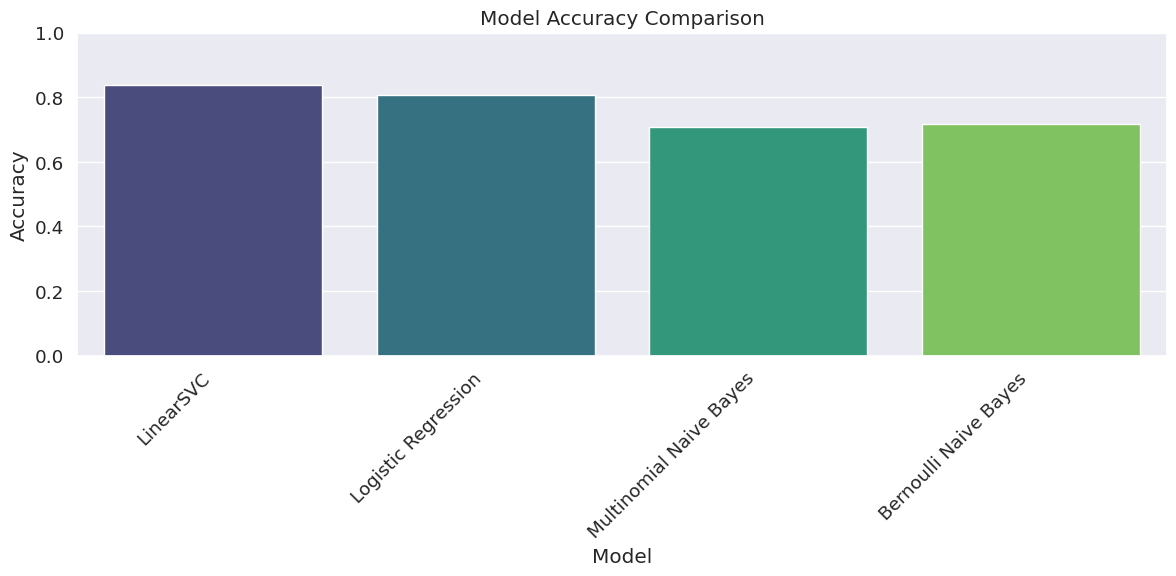

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for model accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=model_metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)  # Set the y-axis limit for accuracy (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


# **Making predictions on realtime news data .........**

We can check the result on real time news headlines!

In [ ]:
sent1 = [""""We'll pay more for the earnings of the non-Covid companies if
The Lancet publishes some good news from AstraZeneca's vaccine trial," Cramer said."""]
y_predict = pipeline_svc.predict(sent1)
print(y_predict)

[2]


In [ ]:
sent2 = ["Rape survivors sustains fatal injuries in Kolkata"]
y_predict = pipeline_svc.predict(sent2)
print(y_predict)

[0]


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_article(url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find and extract the main content of the article
            article_content = ""
            for paragraph in soup.find_all('p'):
                article_content += paragraph.get_text() + "\n"

            return article_content
        else:
            print(f"Failed to retrieve content. Status code: {response.status_code}")
            return None

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Example usage:
url = "https://www.cnbc.com/2023/10/10/paul-tudor-jones-says-its-hard-to-like-stocks-given-geopolitical-risks-weak-us-fiscal-position.html"
article_text = scrape_article(url)
if article_text:
    print(article_text)
else:
    print("Failed to retrieve the article.")


Credit Cards
Loans
Banking
Mortgages
Insurance
Credit Monitoring
Personal Finance
Small Business
Taxes
Help for Low Credit Scores
Investing
SELECT
All Credit Cards
Find the Credit Card for You
Best Credit Cards
Best Rewards Credit Cards
Best Travel Credit Cards
Best 0% APR Credit Cards
Best Balance Transfer Credit Cards
Best Cash Back Credit Cards
Best Credit Card Welcome Bonuses
Best Credit Cards to Build Credit
SELECT
All Loans
Find the Best Personal Loan for You
Best Personal Loans
Best Debt Consolidation Loans
Best Loans to Refinance Credit Card Debt
Best Loans with Fast Funding
Best Small Personal Loans
Best Large Personal Loans
Best Personal Loans to Apply Online
Best Student Loan Refinance
SELECT
All Banking
Find the Savings Account for You
Best High Yield Savings Accounts
Best Big Bank Savings Accounts
Best Big Bank Checking Accounts
Best No Fee Checking Accounts
No Overdraft Fee Checking Accounts
Best Checking Account Bonuses
Best Money Market Accounts
Best CDs
Best Credit Uni

In [ ]:
#The purpose of this function is to prepare text data for further analysis, such as text classification, sentiment analysis, or any NLP-related task,
#by cleaning and standardizing the text. Users can customize the preprocessing steps by specifying whether they want stemming, lemmatization, or neither.
preprocess_text(article_text)

'credit cards loans banking mortgages insurance credit monitoring personal finance small business taxes help low credit scores investing select credit cards find credit card best credit cards best rewards credit cards best travel credit cards best 0 apr credit cards best balance transfer credit cards best cash back credit cards best credit card welcome bonuses best credit cards build credit select loans find best personal loan best personal loans best debt consolidation loans best loans refinance credit card debt best loans fast funding best small personal loans best large personal loans best personal loans apply online best student loan refinance select banking find savings account best high yield savings accounts best big bank savings accounts best big bank checking accounts best fee checking accounts overdraft fee checking accounts best checking account bonuses best money market accounts best cds best credit unions select mortgages best mortgages best mortgages small payment best mo

In [ ]:
y_predict = pipeline_svc.predict([article_text])
print(y_predict)

[2]


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-10-17 05:16:32.982303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 05:16:34.194219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# **Linguistic Analysis**

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
# Process the paragraph with spaCy
doc = nlp(article_text)

# Initialize counts for verbs, adverbs, and nouns
verb_count = 0
adverb_count = 0
noun_count = 0

# Iterate through the tokens in the processed text
for token in doc:
    if token.pos_ == "VERB":
        verb_count += 1
    elif token.pos_ == "ADV":
        adverb_count += 1
    elif token.pos_ == "NOUN":
        noun_count += 1

# Print the counts
print("Verbs:", verb_count)
print("Adverbs:", adverb_count)
print("Nouns:", noun_count)


Verbs: 58
Adverbs: 18
Nouns: 99


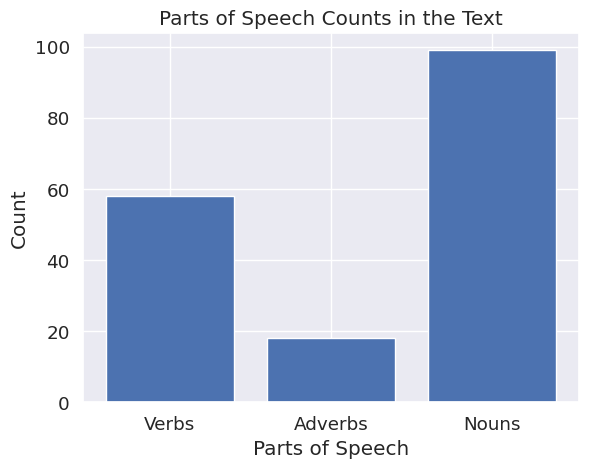

In [ ]:
import matplotlib.pyplot as plt
categories = ["Verbs", "Adverbs", "Nouns"]
counts = [verb_count, adverb_count, noun_count]

plt.bar(categories, counts)
plt.xlabel("Parts of Speech")
plt.ylabel("Count")
plt.title("Parts of Speech Counts in the Text")
plt.show()

# Conclusion

We learn about NLTK, sentiment analysis in this Project.

We conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate
